In [1]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']
X = data
y = labels

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

Initializing an AdaBoost Classifier

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100)
clf = AdaBoostClassifier(DecisionTreeClassifier(random_state = 1), n_estimators = 100, random_state = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_valid))

0.896551724137931


In [3]:
clf = AdaBoostClassifier(n_estimators = 100, random_state = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_valid))

0.896551724137931


What about a Decision Tree Classifier with default parameters?

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_valid))

0.896551724137931


In [5]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

best_acc = 0.0
best_max_depth = 0
best_n_est = 0

for max_depth in [1,2,3]:
    for n_est in [100,200,300]:
        for lr in [0.5, 0.8, 1]:
            clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                             n_estimators=n_est, learning_rate=lr)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_valid)
            y_train_pred = clf.predict(X_train)
    
            acc = accuracy_score(y_pred, y_valid)
    
            print ('Validation Accuracy = ' + str(acc) + ' at max_depth = ' + str(max_depth) + ' estimators = ' + str(n_est) + ' learning rate = ' + str(lr))
            if (acc > best_acc):
                best_acc = acc
                best_max_depth = max_depth
                best_n_est = n_est
                best_lr = lr

print ('')
print ('Best params = ' + str(best_max_depth) + ' ' + str(best_n_est) + ' ' + str(best_lr))

Validation Accuracy = 0.9655172413793104 at max_depth = 1 estimators = 100 learning rate = 0.5
Validation Accuracy = 1.0 at max_depth = 1 estimators = 100 learning rate = 0.8
Validation Accuracy = 0.896551724137931 at max_depth = 1 estimators = 100 learning rate = 1
Validation Accuracy = 1.0 at max_depth = 1 estimators = 200 learning rate = 0.5
Validation Accuracy = 1.0 at max_depth = 1 estimators = 200 learning rate = 0.8
Validation Accuracy = 0.896551724137931 at max_depth = 1 estimators = 200 learning rate = 1
Validation Accuracy = 1.0 at max_depth = 1 estimators = 300 learning rate = 0.5
Validation Accuracy = 1.0 at max_depth = 1 estimators = 300 learning rate = 0.8
Validation Accuracy = 0.896551724137931 at max_depth = 1 estimators = 300 learning rate = 1
Validation Accuracy = 0.896551724137931 at max_depth = 2 estimators = 100 learning rate = 0.5
Validation Accuracy = 0.9310344827586207 at max_depth = 2 estimators = 100 learning rate = 0.8
Validation Accuracy = 1.0 at max_depth =

Single classifier with these parameters

In [6]:
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))

In [7]:
clf = DecisionTreeClassifier(max_depth=best_max_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (accuracy_score(y_pred, y_test))

0.5833333333333334


Adaboost Classifier with 100 of these classifiers on TEST set

In [9]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_max_depth), n_estimators=best_n_est, learning_rate=best_lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (accuracy_score(y_pred, y_test))

0.9166666666666666


Decision Boundary

<Figure size 432x288 with 0 Axes>

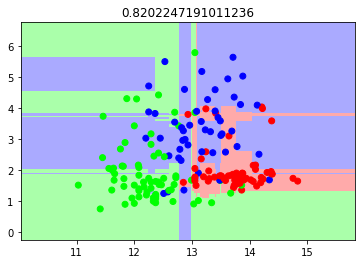

In [10]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.clf()
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         n_estimators=100, learning_rate=0.8)
clf.fit(X[:,:2], y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(accuracy_score(clf.predict(X[:,:2]), y))
plt.show()

### Adaboost Implementation without specifying Decision Trees

In [13]:
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']
X = data
y = labels

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

In [15]:
best_acc = 0.0
best_max_depth = 0
best_n_est = 0

for lr in [0.1, 0.5, 0.8, 1]:
    for n_est in [100,200,300]:
        clf = AdaBoostClassifier(learning_rate=lr, n_estimators=n_est)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        y_train_pred = clf.predict(X_train)

        acc = accuracy_score(y_pred, y_valid)

        print ('Validation Accuracy = ' + str(acc) + ' at lr = ' + str(lr) + ' estimators = ' + str(n_est))
        if (acc > best_acc):
            best_acc = acc
            best_lr = lr
            best_n_est = n_est

print ('')
print ('Best params = ' + str(best_lr) + ' ' + str(best_n_est))

Validation Accuracy = 0.9310344827586207 at lr = 0.1 estimators = 100
Validation Accuracy = 0.9655172413793104 at lr = 0.1 estimators = 200
Validation Accuracy = 0.9655172413793104 at lr = 0.1 estimators = 300
Validation Accuracy = 0.9655172413793104 at lr = 0.5 estimators = 100
Validation Accuracy = 1.0 at lr = 0.5 estimators = 200
Validation Accuracy = 1.0 at lr = 0.5 estimators = 300
Validation Accuracy = 1.0 at lr = 0.8 estimators = 100
Validation Accuracy = 1.0 at lr = 0.8 estimators = 200
Validation Accuracy = 1.0 at lr = 0.8 estimators = 300
Validation Accuracy = 0.896551724137931 at lr = 1 estimators = 100
Validation Accuracy = 0.896551724137931 at lr = 1 estimators = 200
Validation Accuracy = 0.896551724137931 at lr = 1 estimators = 300

Best params = 0.5 200


## Bagging

In [16]:
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']
X = data
y = labels

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [17]:
from sklearn.ensemble import BaggingClassifier

### By default BaggingClassifier Uses Decision Trees

In [69]:
clf = BaggingClassifier(n_estimators=10, max_samples=0.7, max_features=0.7)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
y_true_preds = clf.predict(X_train)

print ('Test accuracy = ' + str(accuracy_score(preds, y_test)))
print ('Train accuracy = ' + str(accuracy_score(y_true_preds, y_train)))

Test accuracy = 0.9444444444444444
Train accuracy = 1.0


### We can pass different models to the classifier

In [21]:
from sklearn.svm import SVC

In [68]:
clf = BaggingClassifier(n_estimators=10, base_estimator=SVC(C=10, kernel='linear'), max_samples=0.7, max_features=0.7)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
y_true_preds = clf.predict(X_train)

print ('Test accuracy = ' + str(accuracy_score(preds, y_test)))
print ('Train accuracy = ' + str(accuracy_score(y_true_preds, y_train)))

Test accuracy = 0.9722222222222222
Train accuracy = 0.9929577464788732


In [ ]:
# Random in nature -> Different result each time possible

### Random Forests

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf = RandomForestClassifier(n_estimators=10, max_depth=5)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
y_true_preds = clf.predict(X_train)

print ('Test accuracy = ' + str(accuracy_score(preds, y_test)))
print ('Train accuracy = ' + str(accuracy_score(y_true_preds, y_train)))

Test accuracy = 0.9722222222222222
Train accuracy = 1.0


<Figure size 432x288 with 0 Axes>

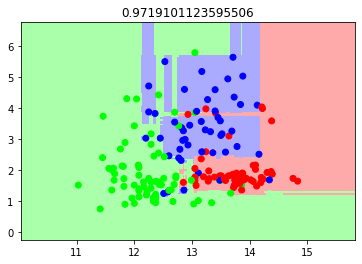

In [75]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.clf()
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X[:,:2], y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(accuracy_score(clf.predict(X[:,:2]), y))
plt.show()